In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import atan2

In [163]:
# df = pd.read_csv('test.csv', sep='\t')

# df

In [164]:
df = pd.DataFrame(columns=['time', 'x1', 'y1', 'x2', 'y2'])

df['time'] = np.arange(0, 100, 0.5)
df['x1'] = np.random.uniform(-0.5, 0.5, df.shape[0])
df['y1'] = np.random.uniform(-0.5, 0.5, df.shape[0])
df['x2'] = np.random.uniform(-0.5, 0.5, df.shape[0])
df['y2'] = np.random.uniform(-0.5, 0.5, df.shape[0])

df

,time,x1,y1,x2,y2
0,0.0,0.225737,0.215708,-0.398085,-0.192996
1,0.5,0.384312,0.183766,-0.386198,-0.084524
2,1.0,0.494511,-0.167245,-0.246391,0.053771
3,1.5,-0.373958,-0.231753,-0.182362,-0.007855
4,2.0,0.328794,-0.357001,0.414538,-0.352498
...,...,...,...,...,...
195,97.5,-0.466058,-0.267350,0.495514,0.303611
196,98.0,0.274228,0.325703,-0.202944,-0.441089
197,98.5,0.369989,-0.095374,-0.223517,0.200613
198,99.0,0.344295,-0.113234,-0.015342,0.416102


In [165]:
def duckduckgo(t1: float, t2: float, *, seed: int = 11) -> float:
    """
    duck and other duck goes.

    :return: random float in [0, 1)
    """

    r1 = df[df['time'] == t1]
    r2 = df[df['time'] == t2]

    duck1 = np.array([(r1['x1'].item(), r1['y1'].item()), (r2['x1'].item(), r2['y1'].item())])
    duck2 = np.array([(r1['x2'].item(), r1['y2'].item()), (r2['x2'].item(), r2['y2'].item())])

    delta_duck1 = duck1[1] - duck1[0]
    delta_duck2 = duck2[1] - duck2[0]

    a1, a2 = atan2(delta_duck1[1], delta_duck1[0]), atan2(delta_duck2[1], delta_duck2[0])

    angle = a2 - a1     # -2pi < angle < 2pi

    return ((angle + 2*np.pi) * seed % (2*np.pi)) / (2*np.pi)

In [166]:
hist = np.array([])

for i in range(len(df)):
    for j in range(i + 1, len(df)):
        t_i, t_j = df['time'][i], df['time'][j]
        angle = duckduckgo(t_i, t_j, seed=12345678)

        print(f'{t_i} {t_j} {angle}')
        hist = np.append(hist, angle)

0.0 0.5 0.8789861065782955
0.0 1.0 0.9895528308824644
0.0 1.5 0.1208807945908067
0.0 2.0 0.9519153342308804
0.0 2.5 0.29089976835374287
0.0 3.0 0.6483859568910909
0.0 3.5 0.6430879877190928
0.0 4.0 0.3241142234608151
0.0 4.5 0.23655909041494824
0.0 5.0 0.2887898560058408
0.0 5.5 0.6477144467430496
0.0 6.0 0.8596921414632035
0.0 6.5 0.24796158492105538
0.0 7.0 0.26749089638169804
0.0 7.5 0.941863626386479
0.0 8.0 0.23675025856026147
0.0 8.5 0.7075307887022079
0.0 9.0 0.5216642482058276
0.0 9.5 0.7852565191100809
0.0 10.0 0.8876678250052101
0.0 10.5 0.9096365700377192
0.0 11.0 0.06640219766297834
0.0 11.5 0.14713755058479175
0.0 12.0 0.32371606567419103
0.0 12.5 0.9443837905722586
0.0 13.0 0.31831720484052783
0.0 13.5 0.38247476196231783
0.0 14.0 0.9350925561044172
0.0 14.5 0.33679201169743517
0.0 15.0 0.6140835645470061
0.0 15.5 0.864399548939023
0.0 16.0 0.42746385155711386
0.0 16.5 0.210921847482429
0.0 17.0 0.4255527249005845
0.0 17.5 0.5728871586655019
0.0 18.0 0.4787528474395329
0.

(array([2020., 1946., 1973., 2054., 1934., 1924., 2054., 2035., 1944.,
        2016.]),
 array([2.07540900e-05, 1.00013308e-01, 2.00005862e-01, 2.99998416e-01,
        3.99990971e-01, 4.99983525e-01, 5.99976079e-01, 6.99968633e-01,
        7.99961187e-01, 8.99953741e-01, 9.99946295e-01]),
 <BarContainer object of 10 artists>)

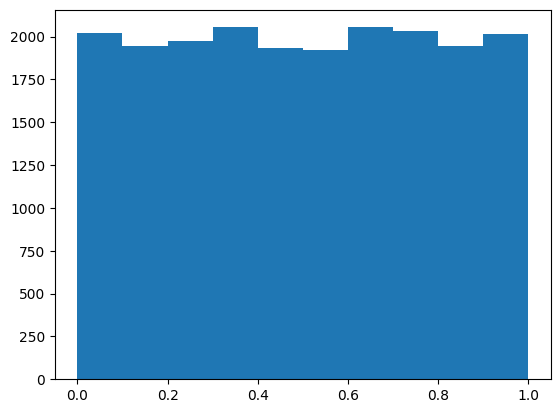

In [167]:
plt.hist(hist)